In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('heart.csv')


In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


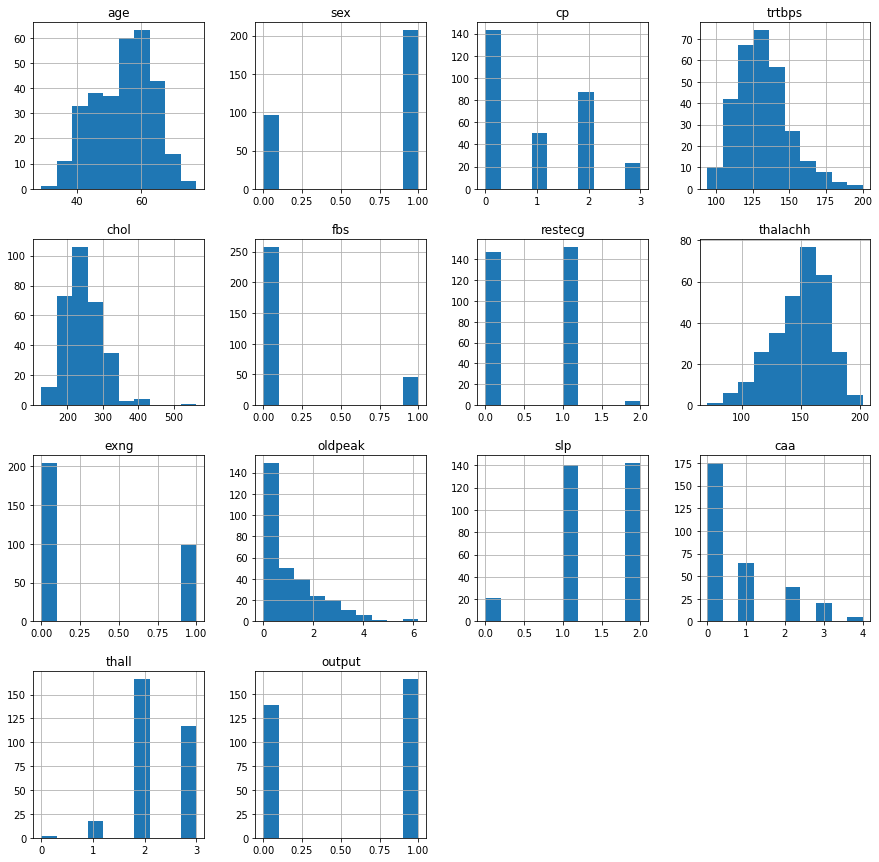

In [10]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = data.hist(ax=ax)

<AxesSubplot:xlabel='output', ylabel='count'>

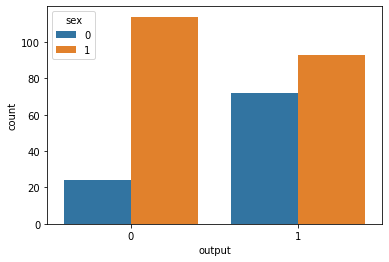

In [11]:
sns.countplot(x='output',hue='sex',data=data)

In [12]:
women=data.loc[data.sex==1]['output']
rate_women=sum(women)/len(women) * 100
print(' % of women got heart attack : ', rate_women)

 % of women got heart attack :  44.927536231884055


In [13]:
men=data.loc[data.sex==0]['output']
rate_men=sum(men)/len(men) * 100
print(' % of men got heart attack : ', rate_men)

 % of men got heart attack :  75.0


<AxesSubplot:xlabel='output', ylabel='count'>

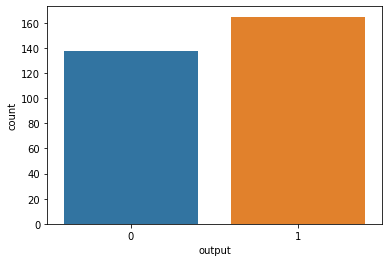

In [14]:
# Visualization to check if the dataset is balanced or not
sns.countplot(x='output', data=data)


<AxesSubplot:xlabel='output', ylabel='count'>

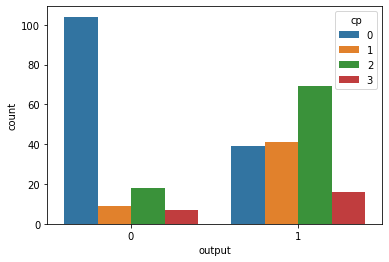

In [15]:
sns.countplot(x='output',hue='cp',data=data) #chest pain type

<AxesSubplot:xlabel='output', ylabel='count'>

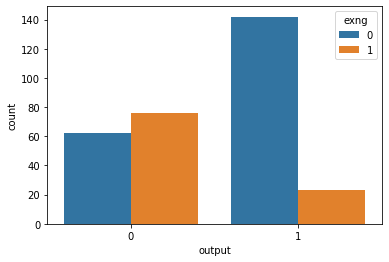

In [16]:
sns.countplot(x='output',hue='exng',data=data) #exercise induced angina

<AxesSubplot:xlabel='output', ylabel='count'>

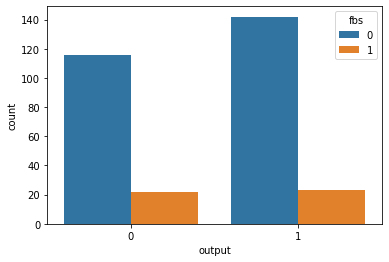

In [17]:
#(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
sns.countplot(x='output',hue='fbs',data=data) 


<AxesSubplot:xlabel='chol', ylabel='Density'>

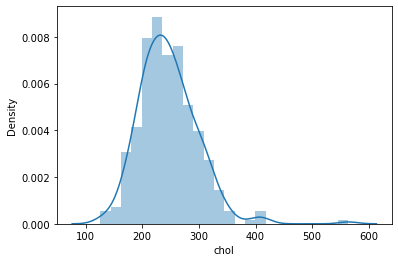

In [18]:
sns.distplot(data['chol']) #cholestoral in mg/dl fetched via BMI sensor

<AxesSubplot:xlabel='age', ylabel='Density'>

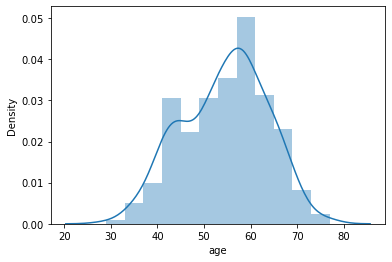

In [19]:
sns.distplot(data['age'])

In [20]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

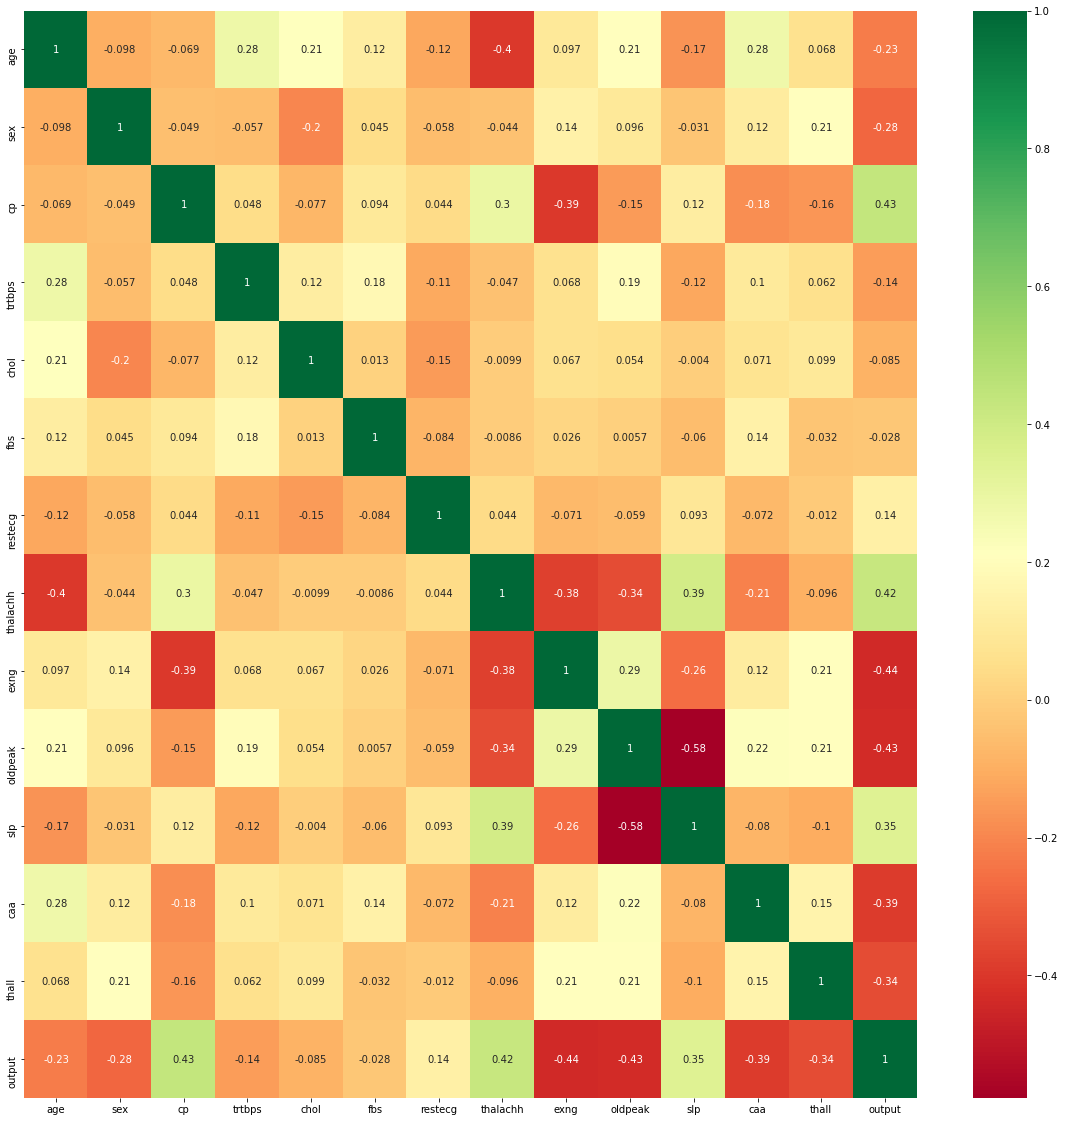

In [21]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = data.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# Outliers Detection

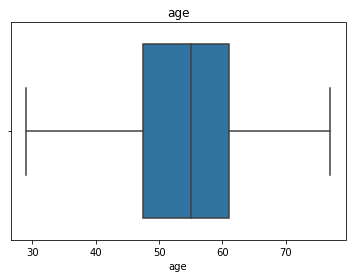

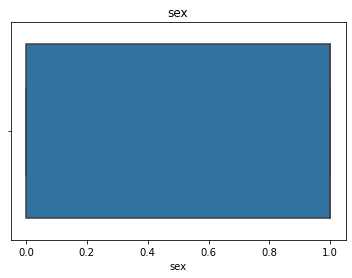

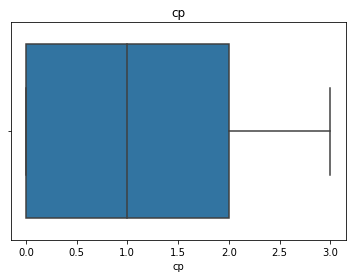

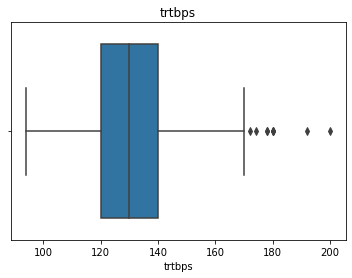

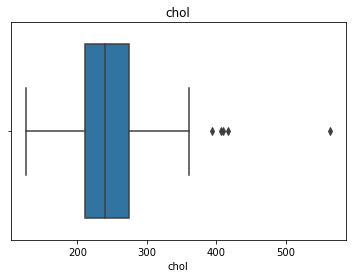

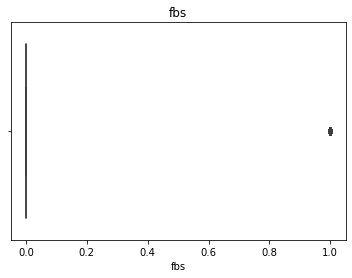

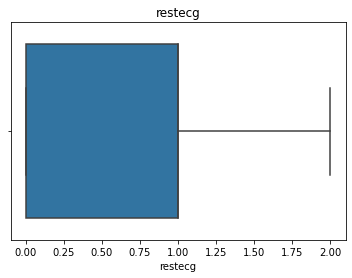

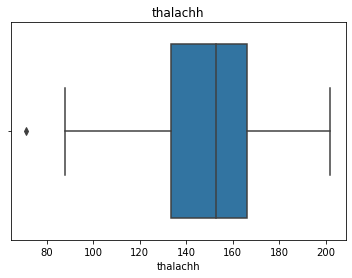

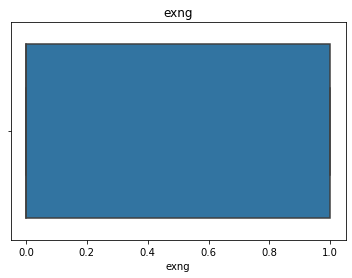

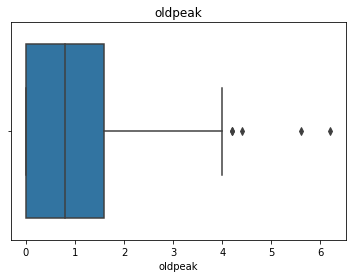

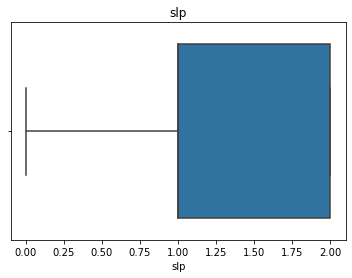

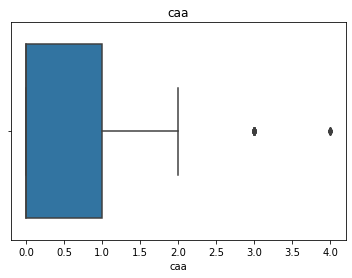

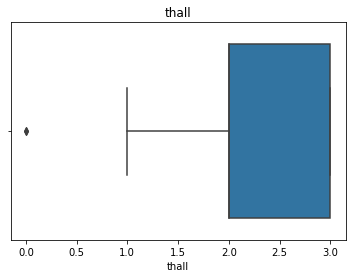

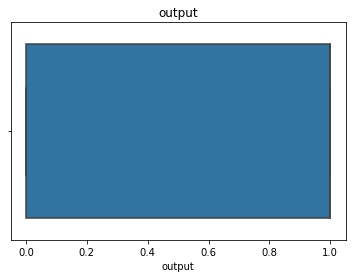

In [22]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

# Handling Outliers

In [23]:
def outlinefree(dataCol):
    sorted(dataCol)
        # getting percentile 25 and 27 that will help us for getting IQR (interquartile range)
    Q1,Q3 = np.percentile(dataCol,[25,75])
        # getting IQR (interquartile range)
    IQR = Q3-Q1
        # getting Lower range error
    LowerRange = Q1-(1.5 * IQR)
        # getting upper range error
    UpperRange = Q3+(1.5 * IQR)
        # return Lower range and upper range.
    return LowerRange,UpperRange

In [24]:
lwtrtbps,uptrtbps = outlinefree(data['trtbps'])
lwchol,upchol = outlinefree(data['chol'])
lwoldpeak,upoldpeak = outlinefree(data['oldpeak'])

In [25]:
data['trtbps'].replace(list(data[data['trtbps'] > uptrtbps].trtbps) ,uptrtbps,inplace=True)
data['chol'].replace(list(data[data['chol'] > upchol].chol) ,upchol,inplace=True)
data['oldpeak'].replace(list(data[data['oldpeak'] > upoldpeak].oldpeak) ,upoldpeak,inplace=True)

In [26]:
dataset = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])

In [27]:
dataset.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exng_0', 'exng_1', 'slp_0', 'slp_1', 'slp_2',
       'caa_0', 'caa_1', 'caa_2', 'caa_3', 'caa_4', 'thall_0', 'thall_1',
       'thall_2', 'thall_3'],
      dtype='object')

In [28]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [29]:
dataset.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.828728,-0.255601,0.015443,1.150938,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.077351,0.102487,1.633471,2.233684,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.077351,-0.866457,0.977514,0.338879,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.681403,-0.192409,1.239897,-0.202494,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.681403,2.293143,0.583939,-0.382951,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Feature Engineering

In [30]:
X=dataset.drop('output',axis=1).values
Y=dataset['output'].values

## Spliting data into train and test sets

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=100)

# Model Building

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
reg= LogisticRegression()  
reg.fit(x_train, y_train)

LogisticRegression()

In [33]:
predict1=reg.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
acc1=accuracy_score(predict1,y_test)
acc1

0.8947368421052632

array([[33,  7],
       [ 1, 35]], dtype=int64)

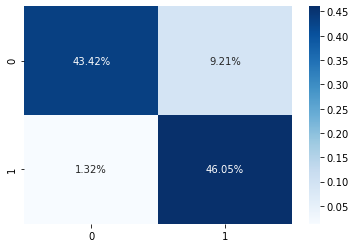

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict1)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
cm

## KNeighbours Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier() 
classifier.fit(x_train, y_train) 


KNeighborsClassifier()

In [37]:
predict2=classifier.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
acc2=accuracy_score(predict2,y_test)
acc2

0.868421052631579

array([[32,  8],
       [ 2, 34]], dtype=int64)

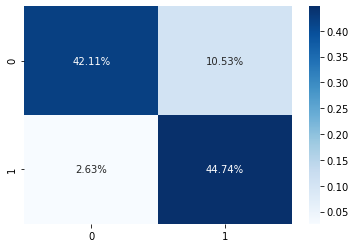

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict2)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
cm

## Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=2)
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)

In [41]:
predict3=tree_classifier.predict(x_test)


In [42]:
from sklearn.metrics import accuracy_score
acc3=accuracy_score(predict3,y_test)
acc3

0.881578947368421

array([[34,  6],
       [ 3, 33]], dtype=int64)

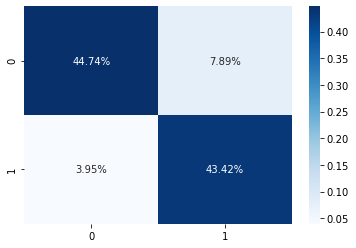

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict3)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
cm

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(max_depth=5, random_state=2)
randomforest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=2)

In [45]:
predict4=randomforest_model.predict(x_test)


In [46]:
from sklearn.metrics import accuracy_score
acc4=accuracy_score(predict4,y_test)
acc4

0.8947368421052632

array([[33,  7],
       [ 1, 35]], dtype=int64)

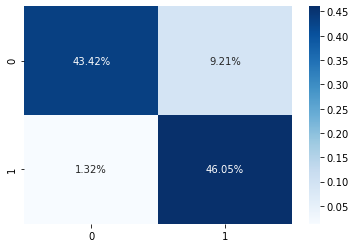

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict4)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
cm

## Gradient Boosting

In [48]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 50

In [49]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model.fit(x_train,y_train)
# results = model_selection.cross_val_score(model, x, y, cv=kfold)
# results

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [ ]:
predict5=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc5=accuracy_score(predict5,y_test)
acc5

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict5)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
cm

# Evaluation

**Precision**

It is the number of correct positive results divided by the number of positive results predicted by the classifier.

**Recall**

It is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).

**f1_score**

F1 Score is used to measure a test’s accuracy

F1 Score is the Harmonic Mean between precision and recall. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,mean_absolute_error,roc_auc_score
def metric(y_test,y_predict):
    ps=precision_score(y_test,y_predict) #Precision
    rs=recall_score(y_test,y_predict) #Recall
    f1s=f1_score(y_test,y_predict) #f1Score
    return(ps,rs,f1s)

## for logistic regression

In [ ]:
lr=list(metric(y_test,predict1))
lr.append(acc1)
lr=pd.Series(lr,index=['precession','Recall','F1_score','accuracy_score'])
lr

## for KNN Classifier

In [ ]:
knn=list(metric(y_test,predict2))
knn.append(acc2)
knn=pd.Series(knn,index=['precession','Recall','F1_score','accuracy_score'])
knn

## for Decision Tree

In [ ]:
dt=list(metric(y_test,predict3))
dt.append(acc3)
dt=pd.Series(dt,index=['precession','Recall','F1_score','accuracy_score'])
dt

## For Random Forest

In [ ]:
rf=list(metric(y_test,predict4))
rf.append(acc4)
rf=pd.Series(rf,index=['precession','Recall','F1_score','accuracy_score'])
rf

## For Gradient Boosting

In [ ]:
gb=list(metric(y_test,predict5))
gb.append(acc5)
gb=pd.Series(gb,index=['precession','Recall','F1_score','accuracy_score'])
gb

In [ ]:
eval=pd.DataFrame([lr,knn,dt,rf,gb],index=['LogisticRegression','KNN_Classifier','Decision_Tree','Random Forest','Gradient Boosting'])

In [ ]:
eval